# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Faizah Hanif Azzahra
- **Email:** faizahhanifazzahra@gmail.com
- **ID Dicoding:** faizahhanifazzahra

## Menentukan Pertanyaan Bisnis

- Apa kategori produk yang paling banyak terjual?
- Seller dari kota manakah yang paling banyak menerima order barang?



## Import Semua Packages/Library yang Digunakan

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

- Memuat tabel seller

In [58]:
seller_df = pd.read_csv("https://raw.githubusercontent.com/faizahhanif/ecommerce_dicoding/main/sellers_dataset.csv")
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


- Memuat tabel product

In [59]:
product_df = pd.read_csv("https://raw.githubusercontent.com/faizahhanif/ecommerce_dicoding/main/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


- Memuat tabel order item

In [60]:
order_item_df = pd.read_csv("https://raw.githubusercontent.com/faizahhanif/ecommerce_dicoding/main/order_items_dataset.csv")
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Assesing Data

- Menilai data seller_df

In [61]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [62]:
seller_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [63]:
print("Jumlah duplikasi: ", seller_df.duplicated().sum())

Jumlah duplikasi:  0


- Menilai data product_df

In [64]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [65]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [66]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

Jumlah duplikasi:  0


In [67]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


- Menilai data order_df

In [68]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [69]:
order_item_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [70]:
print("Jumlah duplikasi: ", order_item_df.duplicated().sum())

Jumlah duplikasi:  0


In [71]:
order_item_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Dari tahapan assessing data, terdapat beberapa masalah pada product_df yakni berupa missing value



### Cleaning Data

Menganani missing value pada product_df di kolom
- product_category_name         610
- product_name_lenght           610
- product_description_lenght    610
- product_photos_qty            610

In [72]:
product_df[product_df.product_description_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [74]:
product1_df = product_df.dropna()

In [75]:
product1_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Karena jumlah missing value terbanyak adalah 610 yang merupakan 1,9% dari total jumlah baris maka dilakukan penghapusan missing value dengan dropna()

## Exploratory Data Analysis (EDA)

### Explore product1_df dan order_item_df

- Untuk mencari kategory nama produk yang paling banyak diorder, maka perlu merging product1_df dan order_item_df

In [76]:
product_order_df = pd.merge(
    left=product1_df,
    right=order_item_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
product_order_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


Selanjutnya membuat pivot tabel dan mengurutkan kategory nama produk terbanyak berdasarkan jumlah order

In [77]:
product_order_df.groupby(by="product_category_name").agg({
    "order_id": "nunique",
    "order_item_id": "sum",
    "price": "sum"
}).sort_values(by="order_item_id", ascending=False)

,order_id,order_item_id,price
product_category_name,,,
cama_mesa_banho,9417,13665,1036988.68
moveis_decoracao,6449,11540,729762.49
beleza_saude,8836,11081,1258681.34
esporte_lazer,7720,9932,988048.97
informatica_acessorios,6689,9874,911954.32
...,...,...,...
portateis_cozinha_e_preparadores_de_alimentos,14,16,3968.53
la_cuisine,13,16,2054.99
pc_gamer,8,11,1545.95


Dari pivot tabel di atas dapat disimpulkan bahwa kategori nama produk yang paling banyak diorder adalah cama_mesa_banbo

### Explore seller_df dan order_item_df

Selanjutnya, akan dicari seller dengan kota mana yang menerima order produk paling banyak, untuk mengetahuinya harus dilakukan merging df yaitu seller_df dan order_item_df

In [78]:
seller_order_df = pd.merge(
    left=seller_df,
    right=order_item_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
seller_order_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89


Menggunakan pivot tabel untuk mencari kota seller dengan jumlah order terbanyak

In [79]:
seller_order_df.groupby(by="seller_city").agg({
    "order_id": "nunique",
    "order_item_id": "sum",
    "price": "sum"
}).sort_values(by="order_item_id", ascending=False)

,order_id,order_item_id,price
seller_city,,,
sao paulo,24588,33946,2702878.14
ibitinga,6565,9542,624592.94
sao jose do rio preto,1973,3659,195863.38
santo andre,2711,3516,228561.60
curitiba,2722,3497,470759.82
...,...,...,...
messias targino,1,1,98.00
minas gerais,1,1,249.90
mogi das cruzes / sp,1,1,54.00


Kota San Paulo adalah kota dengan seller yang menerima order paling banyak

In [80]:
product_order_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111046 entries, 0 to 111045
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  111046 non-null  object 
 1   product_category_name       111046 non-null  object 
 2   product_name_lenght         111046 non-null  float64
 3   product_description_lenght  111046 non-null  float64
 4   product_photos_qty          111046 non-null  float64
 5   product_weight_g            111046 non-null  float64
 6   product_length_cm           111046 non-null  float64
 7   product_height_cm           111046 non-null  float64
 8   product_width_cm            111046 non-null  float64
 9   order_id                    111046 non-null  object 
 10  order_item_id               111046 non-null  int64  
 11  seller_id                   111046 non-null  object 
 12  shipping_limit_date         111046 non-null  object 
 13  price         

In [81]:
seller_order_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   seller_id               112650 non-null  object 
 1   seller_zip_code_prefix  112650 non-null  int64  
 2   seller_city             112650 non-null  object 
 3   seller_state            112650 non-null  object 
 4   order_id                112650 non-null  object 
 5   order_item_id           112650 non-null  int64  
 6   product_id              112650 non-null  object 
 7   shipping_limit_date     112650 non-null  object 
 8   price                   112650 non-null  float64
 9   freight_value           112650 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 9.5+ MB


## Visualization & Explanatory Analysis

### Explore

In [82]:
sum_order_items_df = product_order_df.groupby("product_category_name").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,product_category_name,order_item_id
0,cama_mesa_banho,13665
1,moveis_decoracao,11540
2,beleza_saude,11081
3,esporte_lazer,9932
4,informatica_acessorios,9874
5,utilidades_domesticas,9051
6,relogios_presentes,6594
7,ferramentas_jardim,5874
8,telefonia,5161
9,automotivo,4881


<ipython-input-83-beef9ed81166>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
<ipython-input-83-beef9ed81166>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])


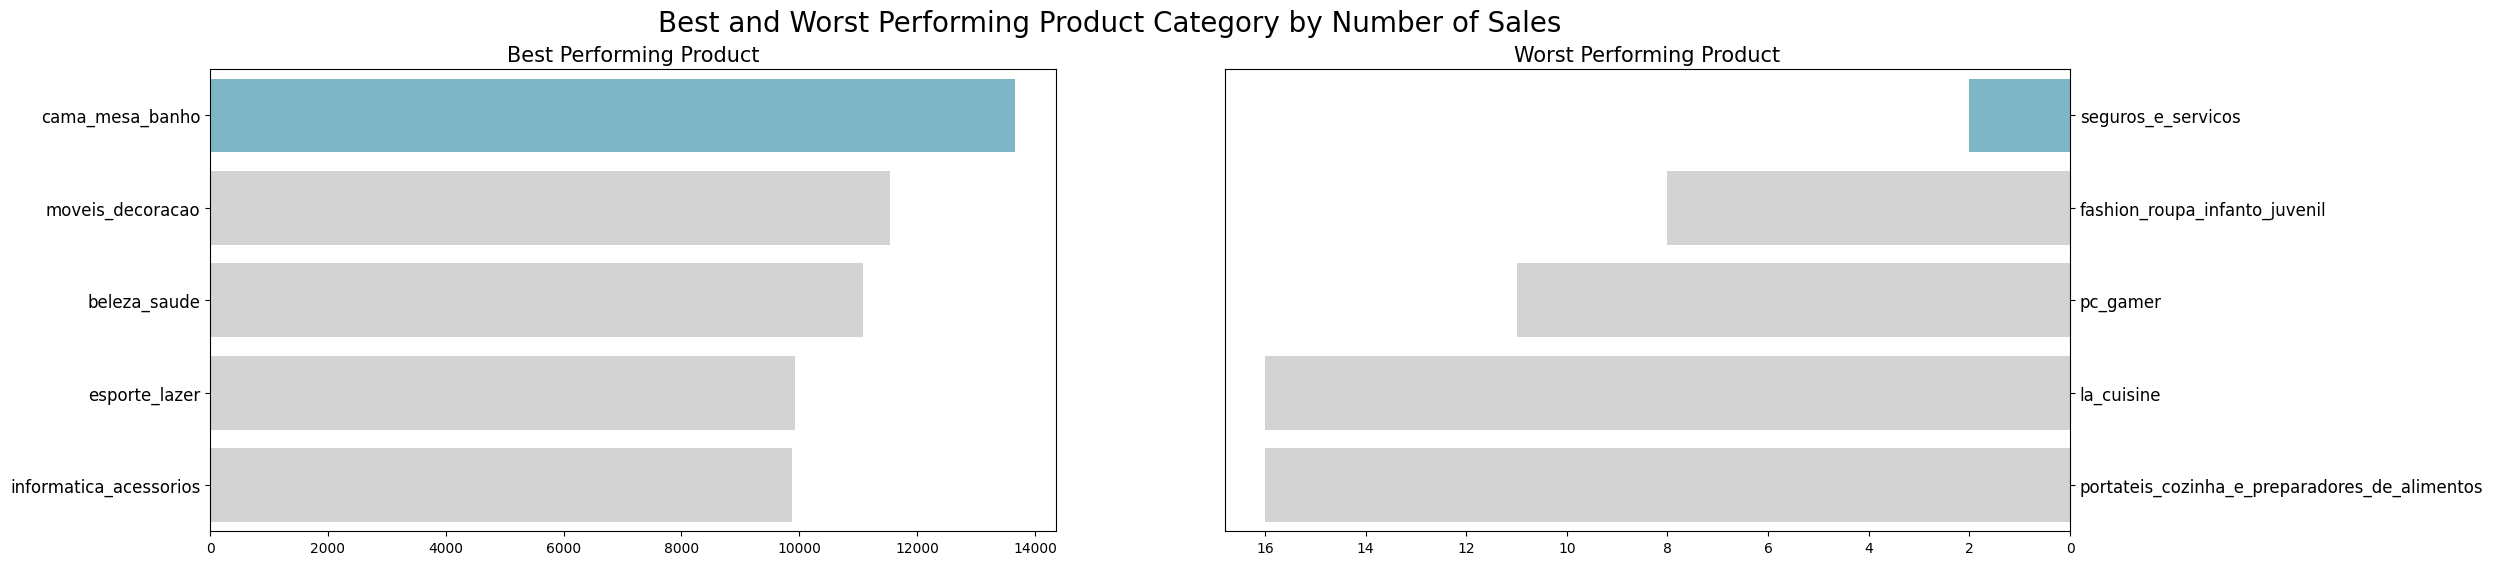

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product Category by Number of Sales", fontsize=20)
plt.show()

In [84]:
seller_city_order_df = seller_order_df.groupby("seller_city").order_item_id.sum().sort_values(ascending=False).reset_index()
seller_city_order_df.head(15)

,seller_city,order_item_id
0,sao paulo,33946
1,ibitinga,9542
2,sao jose do rio preto,3659
3,santo andre,3516
4,curitiba,3497
5,rio de janeiro,2912
6,belo horizonte,2847
7,guarulhos,2839
8,maringa,2777
9,ribeirao preto,2696


<ipython-input-85-7b5a36fc7771>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="seller_city", data=seller_city_order_df.head(5), palette=colors, ax=ax[0])
<ipython-input-85-7b5a36fc7771>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="seller_city", data=seller_city_order_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])


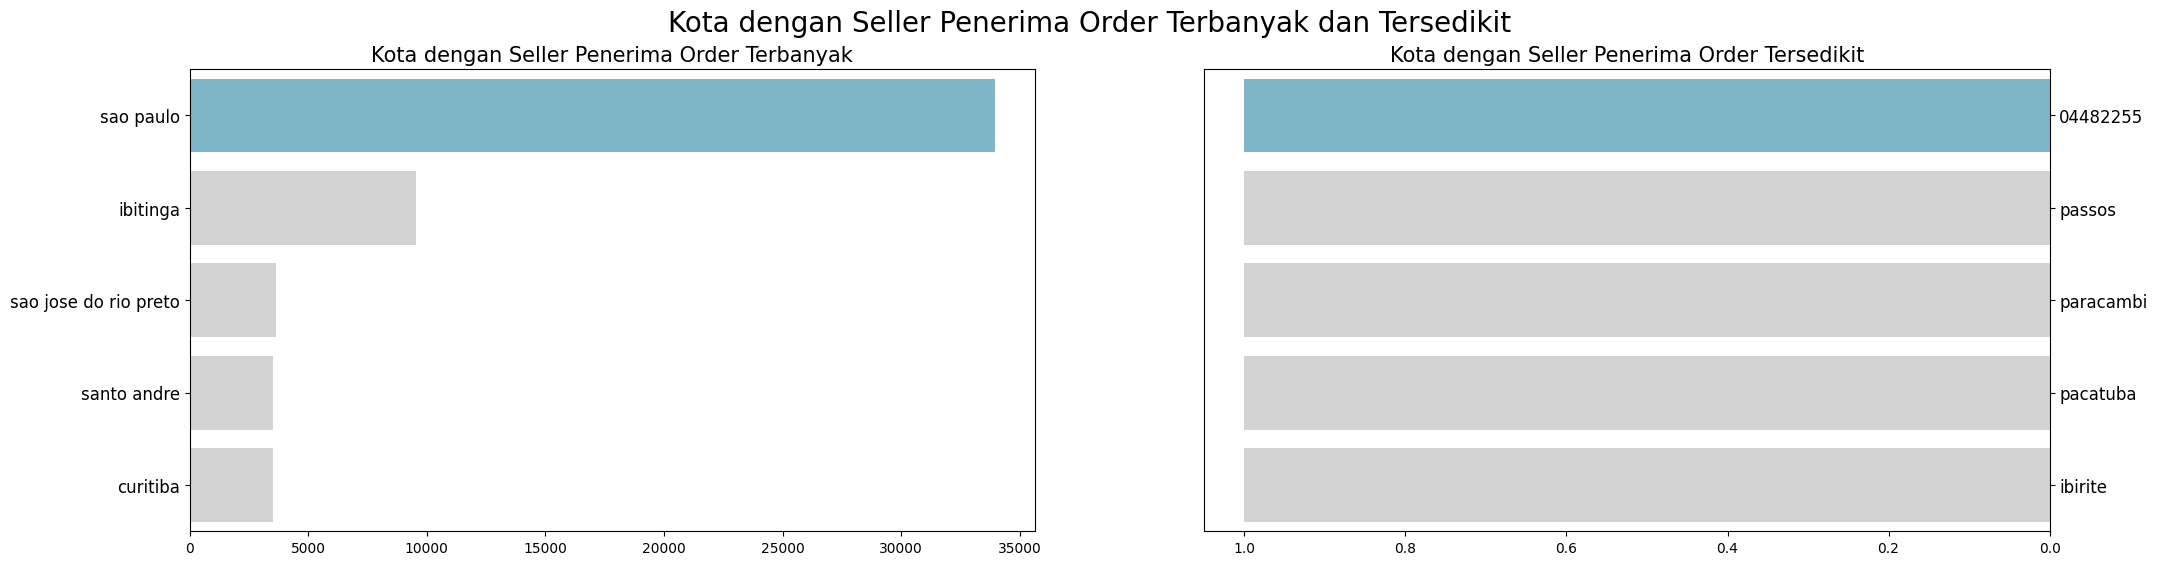

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_item_id", y="seller_city", data=seller_city_order_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Kota dengan Seller Penerima Order Terbanyak", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_item_id", y="seller_city", data=seller_city_order_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Kota dengan Seller Penerima Order Tersedikit", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Kota dengan Seller Penerima Order Terbanyak dan Tersedikit", fontsize=20)
plt.show()

In [86]:
product_order_df.to_csv("product_order_df.csv", index=False)

In [87]:
seller_order_df.to_csv("seller_order_df.csv", index = False)

In [94]:
! pip install streamlit -q

In [96]:
!wget -q -O - ipv4.icanhazip.com

34.148.47.82


In [103]:
! streamlit run dashboard.py & npx localtunnel --port 8501

^C
